In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
def creat_agents(L):
    """
    输入：
    L scaler 范围
    
    输出：
    X nparray(n,)
    """
    X = np.linspace(0,L,100*L)
    return X

In [16]:
def opinion_update(X_t):
    """
    输入：
    X_t        ndarray(n,)  
    
    输出：
    X_         ndarray(n,)
    """
    m = X_t.shape[0]
    X_ = np.zeros(m)
    
    for i in range(m):
        neighbor = 0
        times = 0
        for j in range(m):
             if(np.abs(X_t[i] - X_t[j]) < 1):
                neighbor += X_t[j]
                times += 1
        X_[i] = neighbor/times
    return X_

In [17]:
def get_clusters(L,X):
    """
    输入：
    L scaler
    X ndarray(n,)
    输出：
    L_result ndarray
    """
    m = X.shape[0]
    L_all =[]
    L_set = set()
    L_result = []
    index_num = L + 1
    for i in range(index_num):
        index = (int)(m/L)*i - 1
        L_all.append(X[index])
    for num in L_all:
        if num not in L_result:
            L_set.add(num)
            L_result.append(num)
    L_result = np.array(L_result)

    return L_result

In [18]:
def update_and_plot(X, iteration):
    m = X.shape[0]
    y_0 = np.zeros(m)
    plt.figure(figsize=(5,5))
    plt.scatter(y_0,X,s=1)
    for i in range(iteration):
        y = y_0 + i
        X = opinion_update(X)
        plt.scatter(y,X,s=1)
    return X

In [28]:
def get_and_draw(L,X_clusters):
    m = X_clusters.shape[0]
    distance = np.zeros(m)
    distance = distance + L/2
    y = X_clusters - distance
    x = np.zeros(m)
    x = x + L
    for i in range(m):
        plt.scatter(x[i],y[i],s=1)
    return y

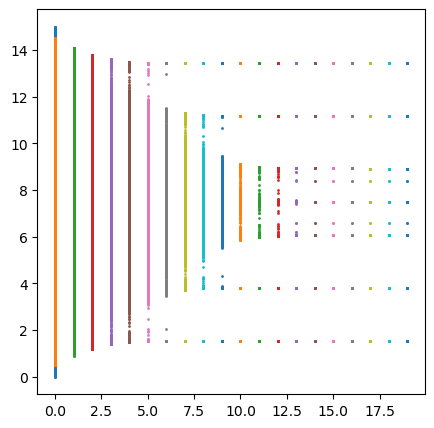

In [29]:
X_15 = creat_agents(15)
X_15_result = update_and_plot(X_15,20)

In [21]:
X_15_L = get_clusters(15,X_15_result)
X_15_L

array([13.45259676,  1.54740324,  3.81737679,  6.08612306,  7.5       ,
        8.91387694, 11.18262321])

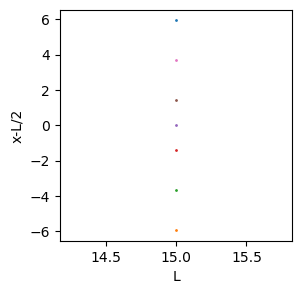

In [33]:
plt.figure(figsize=(3,3))
plt.xlabel("L")
plt.ylabel("x-L/2")
y = get_and_draw(15,X_15_L)

In [34]:
y

array([ 5.95259676, -5.95259676, -3.68262321, -1.41387694,  0.        ,
        1.41387694,  3.68262321])